# Практическая работа №2: Исследование задач о раскрасках
Выполнил студент гр. 0304 Голиков Анатолий, вариант 30.

## Цель работы

Формирование представления о задачах о раскрасках, выработать умение использование леммы Бёрнсайда для решения задачи о раскрасках, привить навык использования систем компьютерной алгебры для реализации алгоритмов решения задачи.

## Основные теоретические положения

#### Определение действия группы на множестве

Пусть $\mathbb{G}$ - группа, $e$ - нейтральный элемент группы $\mathbb{G}$, $\mathbb{X}$ - множество.

$\mathbb{G}$ действует на $\mathbb{X}$, если задана операция $\mathbb{G} \times \mathbb{X} \rightarrow \mathbb{X}$ такая, что $\forall x \in \mathbb{X}$, $g, h \in \mathbb{G}$ выполняется:
1. $e x = x$
2. $g (h x) = (g h) x$

#### Определение орбиты

Орбитой $x \in \mathbb{X}$ под действием группы $\mathbb{G}$ называется множество $\mathbb{G} x=\{g x | g \in \mathbb{G}\}$ 

Длина орбиты равна $|\mathbb{G} x|$.

#### Определение неподвижной точки

Неподвижными точками элемента $g \in \mathbb{G}$ называются такие $x \in \mathbb{X}$, для которых выполняется: $g x = x$. 

Множество неподвижных точек элемента $g \in \mathbb{G}$ обозначается как $\mathbb{X}^g$.

#### Лемма Бёрнсайда

Количество орбит действия группы $\mathbb{G}$ на $\mathbb{X}$ равно $\frac{1}{|\mathbb{G}|} \sum_{g \in \mathbb{G}}{|\mathbb{X}^g|}$. 

#### Задача о раскраске

Пусть $I$ - произвольное множество, $\mathbb{C}$ - множество цветов. 

Раскраской множества $I$ называется функция $\varphi: I \rightarrow \mathbb{C}$. 

$\mathbb{C}^I$ - множество всех раскрасок. 

$|\mathbb{C}^I|=|\mathbb{C}|^{|I|}$ - количество всех раскрасок.

#### Следствие

Количество раскрасок из $\mathbb{C}^{I}$, которые сохраняют данный элемент $g \in \mathbb{G}$, равно $|\mathbb{C}|^{c(\varphi(g))}$, где $c(\varphi)$ - количество независимых циклов в записи перестановки $\varphi$.

#### Лемма

Пусть $\tau$ является циклом длины $k$, а $НОД(k, n) = d$.

Тогда перестановка $\tau^n$ является произведением d циклов длины $\frac{k}{d}$.


## Выполнение работы

### Аналитическое решение задачи о раскрасках

Круг разбит на 28 секторов, каждый из которых покрашен в один из 4 цветов. Сколькими способами можно составить такую мозаику(с точностью до поворотов круга)?

Возьмем $\mathbb{C}$ - множество цветов.
Возьмем $I$ - множество секторов круга.

Всего вариантов раскраски секторов круга: $4^{28}$. На множество $\mathbb{C}^I$ всех раскрасок действует группа поворотов. Раскраски, совмещаемые друг с другом каким-нибудь преобразованием из группы $\mathbb{G}$, будут задавать одинаковый круг. При этом раскраски будут задавать одинаковый круг тогда и только тогда, когда они лежат в одной орбите под действием группы $\mathbb{G}$. Таким образом задача сводится к нахождению количества орбит действия группы $\mathbb{G}$ на множество $\mathbb{C}^I$.

Пусть $\tau$ - поворот, переводящий каждое место в следующее

Тогда $\mathbb{S}_I = \{e=\tau^{0}, \tau^{1}, \tau^{2}, \ldots, \tau^{27}, \tau^{28}\}.$

Выпишем все возможные элементы симметрической группы $\mathbb{S}_I$:

$e =\begin{pmatrix}
      1 & 2 & 3 & \ldots & 28 \\
      1 & 2 & 3 & \ldots & 28
    \end{pmatrix} = (1)(2)(3)\ldots(27)(28)$ 
    
$\tau = \begin{pmatrix}
          1 & 2 & 3 & \ldots & 27 & 28 \\
          2 & 3 & 4 & \ldots & 28 & 1
        \end{pmatrix} = (1, 2, 3, \ldots, 27, 28)$ 
        
$\tau^2 = \tau(\tau) = \begin{pmatrix}
          1 & 2 & 3 & \ldots & 27 & 28 \\
          3 & 4 & 5 & \ldots & 1 & 2
        \end{pmatrix} = (1, 3, 5, \ldots, 26, 27)(2, 4, 6, \ldots, 26, 28)$ 

$\ldots$

$\tau^{k} = \begin{pmatrix}
          1 & 2 & 3 & \ldots & 27 & 28 \\
          (1 + k)mod(28) & (2 + k)mod(28) & (3 + k)mod(28) & \ldots & (27 + k)mod(28) & (28 + k)mod(28)
        \end{pmatrix}$
        
$\ldots$

$\tau^{27} = \begin{pmatrix}
          1 & 2 & 3 & \ldots & 27 & 28 \\
          28 & 1 & 2 & \ldots & 26 & 27
        \end{pmatrix} = (28, 27, 26, \ldots, 2, 1)$ 
        
$\tau^{28} = e$ 

Перестановка $\tau$ является циклом длины 28. Пользуясь леммой 1, можно посчитать количество циклов в перестановке $\tau^k \ \forall k \in \{0, 1, 2, 3, \ldots, 27\}$: любая перестановка $\tau^k$ является произведением $d = НОД(28,k)$ независимых циклов.

In [86]:
gcds = dict()

for k in range(28):
    gcd = GCD(28, k)
    
    if gcd in gcds.keys():
        gcds[gcd].append(k)
    else:
        gcds[gcd] = [k]
        
for pair in gcds.items():
    print("GCD(28, k) = {} for k {}. Size: {}.".format(pair[0], pair[1], len(pair[1])))
    

GCD(28, k) = 28 for k [0]. Size: 1.
GCD(28, k) = 1 for k [1, 3, 5, 9, 11, 13, 15, 17, 19, 23, 25, 27]. Size: 12.
GCD(28, k) = 2 for k [2, 6, 10, 18, 22, 26]. Size: 6.
GCD(28, k) = 4 for k [4, 8, 12, 16, 20, 24]. Size: 6.
GCD(28, k) = 7 for k [7, 21]. Size: 2.
GCD(28, k) = 14 for k [14]. Size: 1.


Теперь из следствия можно найти количество раскрасок, которые сохраняет данный элемент $g \in \mathbb{G}$:

$|\mathbb{C}^{e}| = |\mathbb{C}^{c(\tau^0)}| = |\mathbb{C}^{c(e)}| = 4^{28}$ для $g = e$.

$|\mathbb{C}^{\tau^k}| = |\mathbb{C}^{c(\tau^k)}| = 4^{1} = 4$ для $g = \tau^k, k \in \{1, 3, 5, 9, 11, 13, 15, 17, 19, 23, 25, 27\}$. Количество различных $k$: $12$. 

$|\mathbb{C}^{\tau^k}| = |\mathbb{C}^{c(\tau^k)}| = 4^{2}$ для $g = \tau^k, k \in \{[2, 6, 10, 18, 22, 26\}$. Количество различных $k$: $6$. 

$|\mathbb{C}^{\tau^k}| = |\mathbb{C}^{c(\tau^k)}| = 4^{4}$ для $g = \tau^k, k \in \{4, 8, 12, 16, 20, 24\}$. Количество различных $k$: $6$. 

$|\mathbb{C}^{\tau^k}| = |\mathbb{C}^{c(\tau^k)}| = 4^{7}$ для $g = \tau^k, k \in \{[7, 21\}$. Количество различных $k$: $2$. 

$|\mathbb{C}^{\tau^k}| = |\mathbb{C}^{c(\tau^k)}| = 4^{14}$ для $g = \tau^k, k \in \{14\}$. Количество различных $k$: $1$. 

$|\mathbb{G}| = 28$

Теперь воспользуемся леммой Бернсайда:

Количество различных способов раскрасить сектора круга с точностью до поворота круга равно $N = \frac{1}{|\mathbb{G}|} \sum_{g \in \mathbb{G}}{|\mathbb{X}^g|} = \frac{1}{28}(4^{28} + 12 \cdot 4^{1} + 6 \cdot 4^{2} + 6 \cdot 4^{4} + 2 \cdot 4^{7} + 1 \cdot 4^{14}) = 2573485510942780$

In [70]:
(1/28*(4**28+12*4+6*4**2+6*4**4+2*4**7+1*4**14))

2573485510942780

### Реализация графического отображения круга

In [92]:
from enum import Enum
from random import randint

class Seg:
    def __init__(self, number, color):
        self.number = number
        self.color = color
        
class Color(Enum):
    BLUE = (0.4, 0.1, 1)
    RED = (0.95, 0, 0)
    GREEN = (0.5, 0.7, 0)
    ORANGE = (1, 0.7, 0)
          
class Circle:
    def __init__(self, segs_num, number = None):
        self.segs_num = segs_num
        color_list = list(Color)
        
        if number is None:
            self.Segs = [Seg(s + 1, color_list[randint(0, 3)]) for s in range(segs_num)]
        else:
            self.Segs = [Seg(s + 1, color_list[int(number[s])]) for s in range(segs_num)]
            
        self.shift = 0
        
    def get_Seg(self, index):
        return self.Segs[(self.shift + index) % self.segs_num]
    
    def set_Seg(self, index, value):
        self.Segs[(self.shift + index) % self.segs_num] = value    
        
    def rotateRight(self, Segs_count):
        self.shift += Segs_count
        
    def rotateLeft(self, Segs_count):
        self.shift -= Segs_count
        
    def printCircle(self):
        r = 10
        thickness = 1
        segs_num = self.segs_num
        step = 1
        G = Graphics()
        
        for j in range(segs_num):
            L = [[(r + thickness) * cos(2 * pi * (i + j * step) / (segs_num * step)), 
                  (r + thickness) * sin(2 * pi * (i + j * step) / (segs_num * step))] for i in range(step + 1)]
            L.extend([[r * cos(2 * pi * (j * step + step - i) / (segs_num * step)), 
                       r * sin(2 * pi * (j * step + step - i) / (segs_num * step))] for i in range(step + 1)])
            G += polygon2d(L, axes=False, rgbcolor=self.get_Seg(j).color.value, edgecolor="black")
            G += text(str(self.get_Seg(j).number), ((r + thickness / 2) * cos(2 * pi * (1 + j * 2) / (segs_num * 2)), 
                                   (r + thickness / 2) * sin(2 * pi * (1 + 2 * j) / (segs_num * 2))), rgbcolor="black", fontsize=14)
            G += text(str(j + 1), ((r - thickness / 2) * cos(2 * pi * (1 + j * 2) / (segs_num * 2)), (r - thickness / 2) * sin(2 * pi * (1 + 2 * j) / (segs_num * 2))), rgbcolor="black", fontsize=14)
        G.show(figsize=[20,20])

Colors:
00131203210230200203203203203
Circle for num 555555555555555555555555:


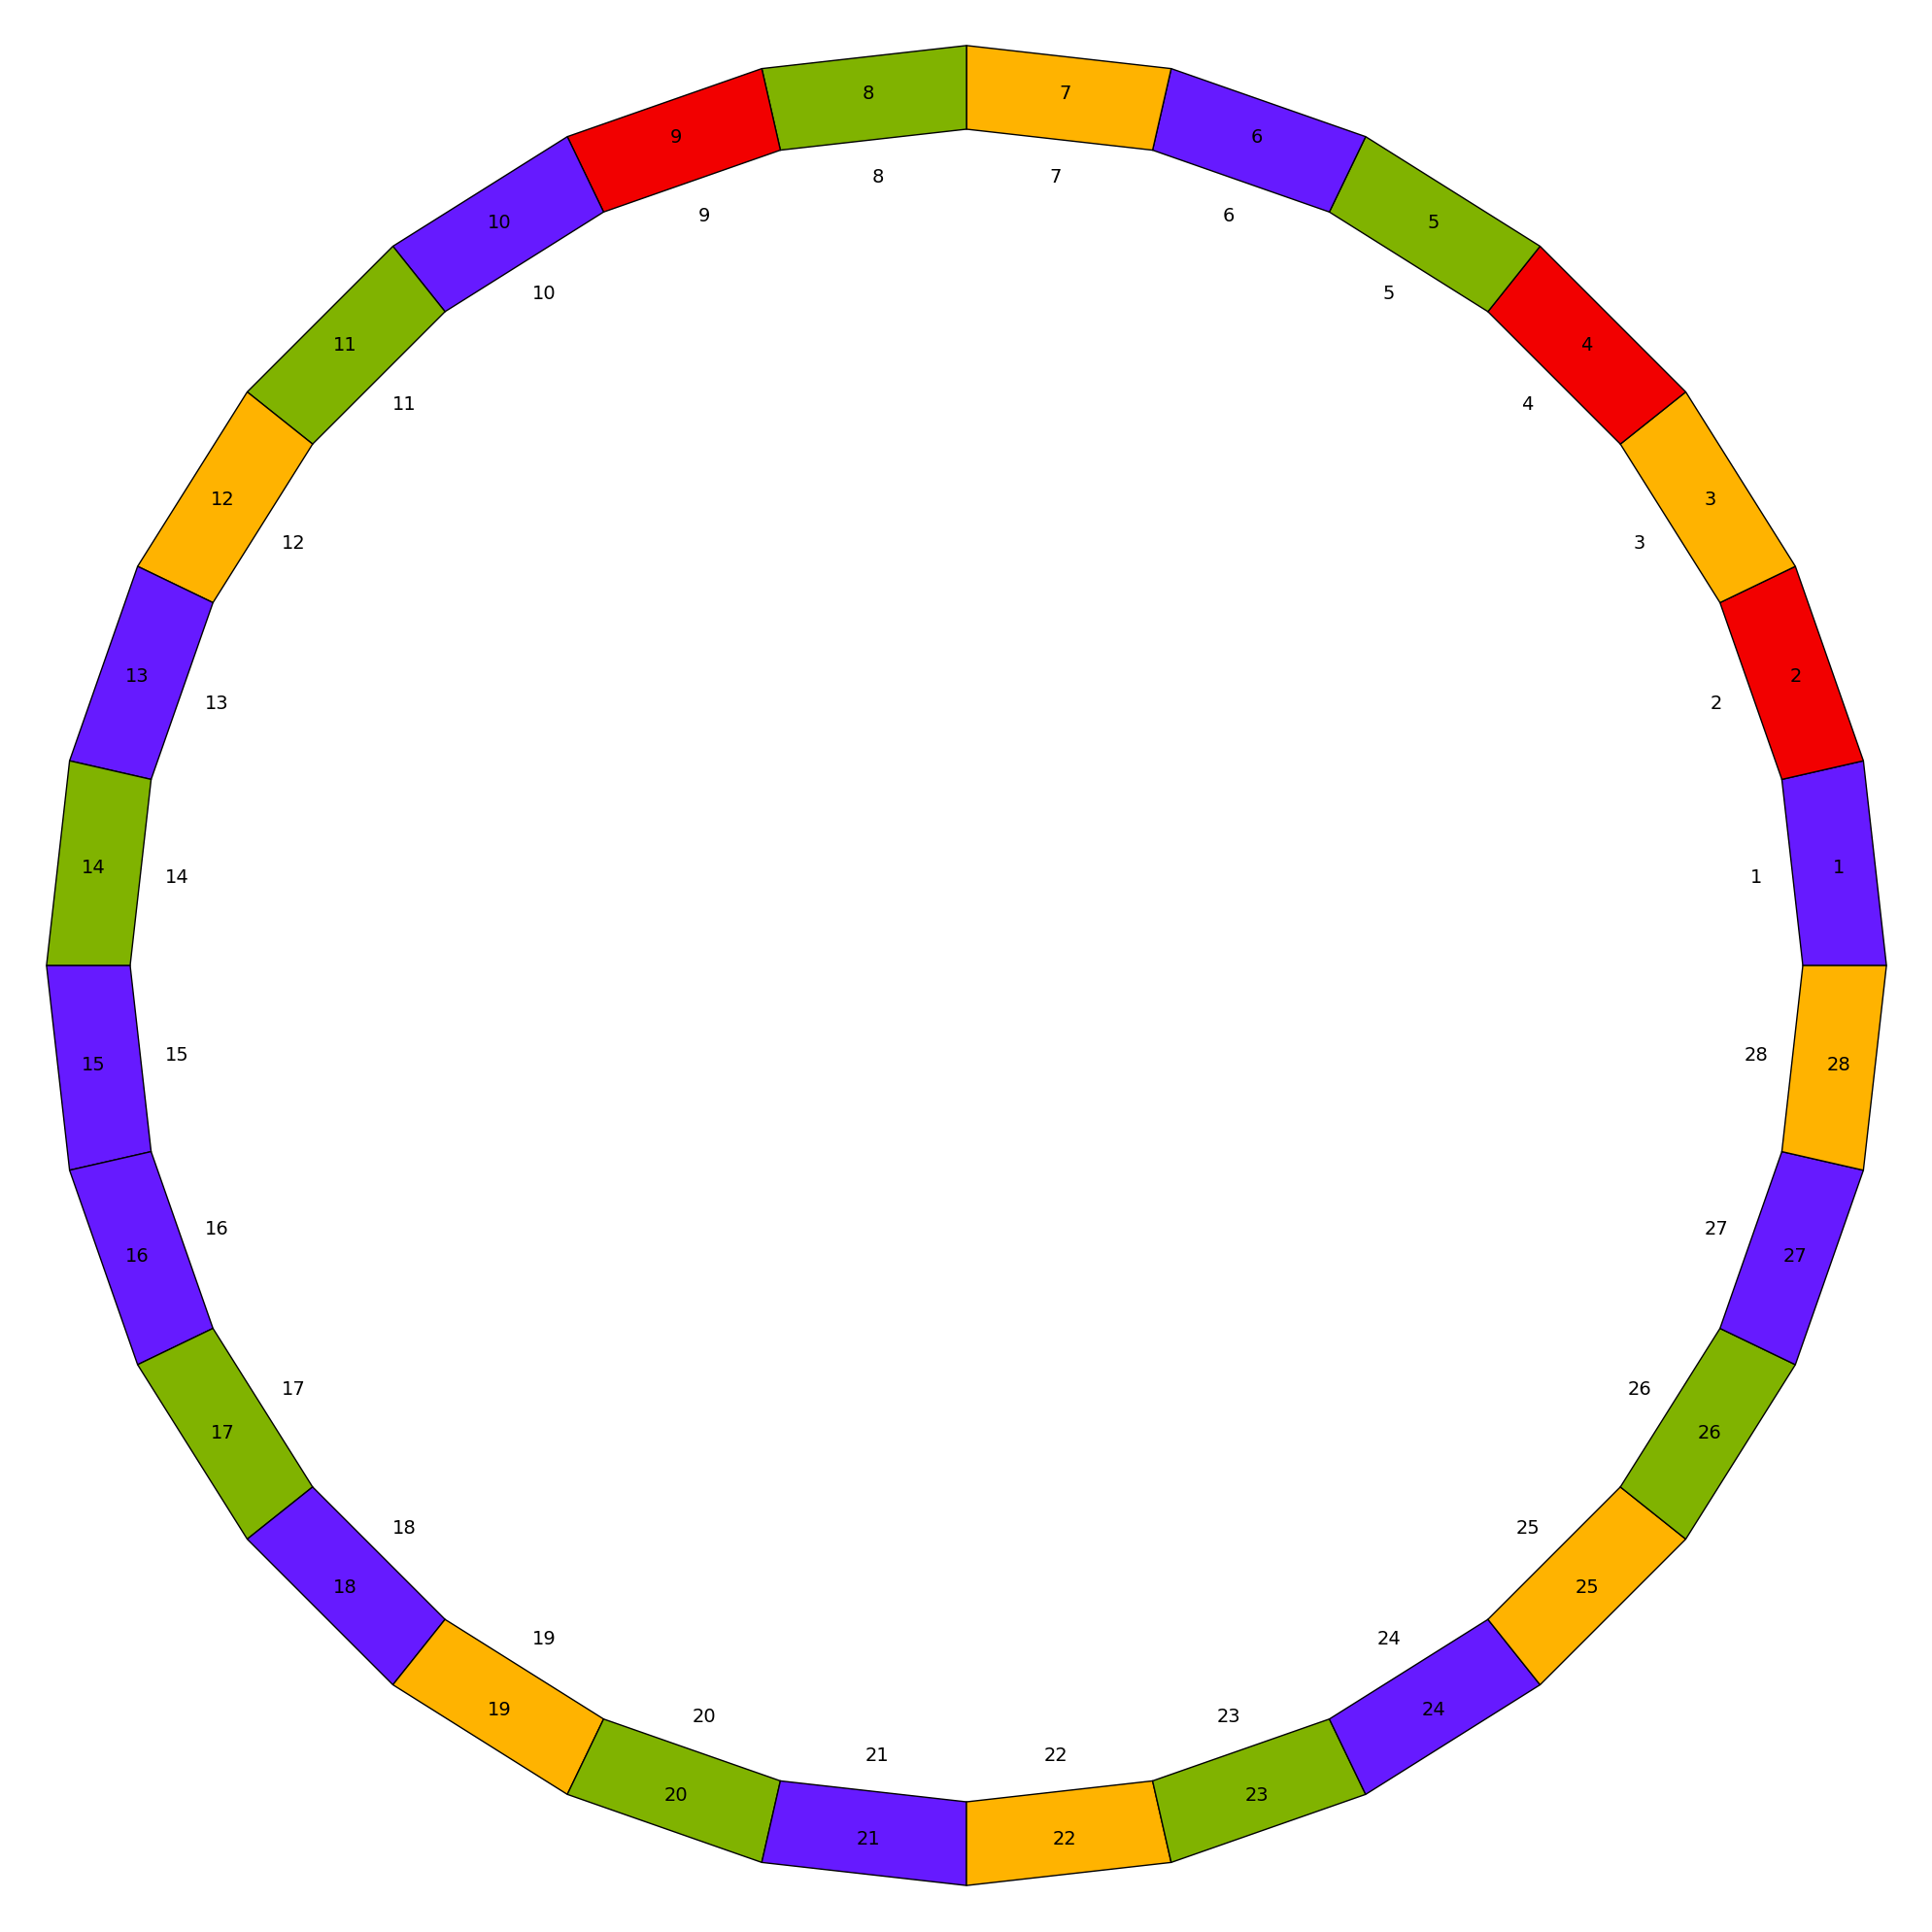

In [93]:
def get_num(order_number, sectors_count):
    if order_number > 4 ** sectors_count:
        order_number = order_number % (4 ** sectors_count)
    num = ""
    while order_number > 0:
        num = str(order_number % 4) + num
        order_number //= 4
    if len(num) < sectors_count:
        num = '0' * (sectors_count - len(number)) + num
        print("Colors:")
        print('0' * (sectors_count - len(number)) + num)
    return num
sectors_count = 28
order_number = 555555555555555555555555
number = get_num(order_number, sectors_count)
circle = Circle(len(number), number)
print("Circle for num {}:".format(order_number))
circle.printCircle()

### Выполним поворот круга

Do 5 segments rotate


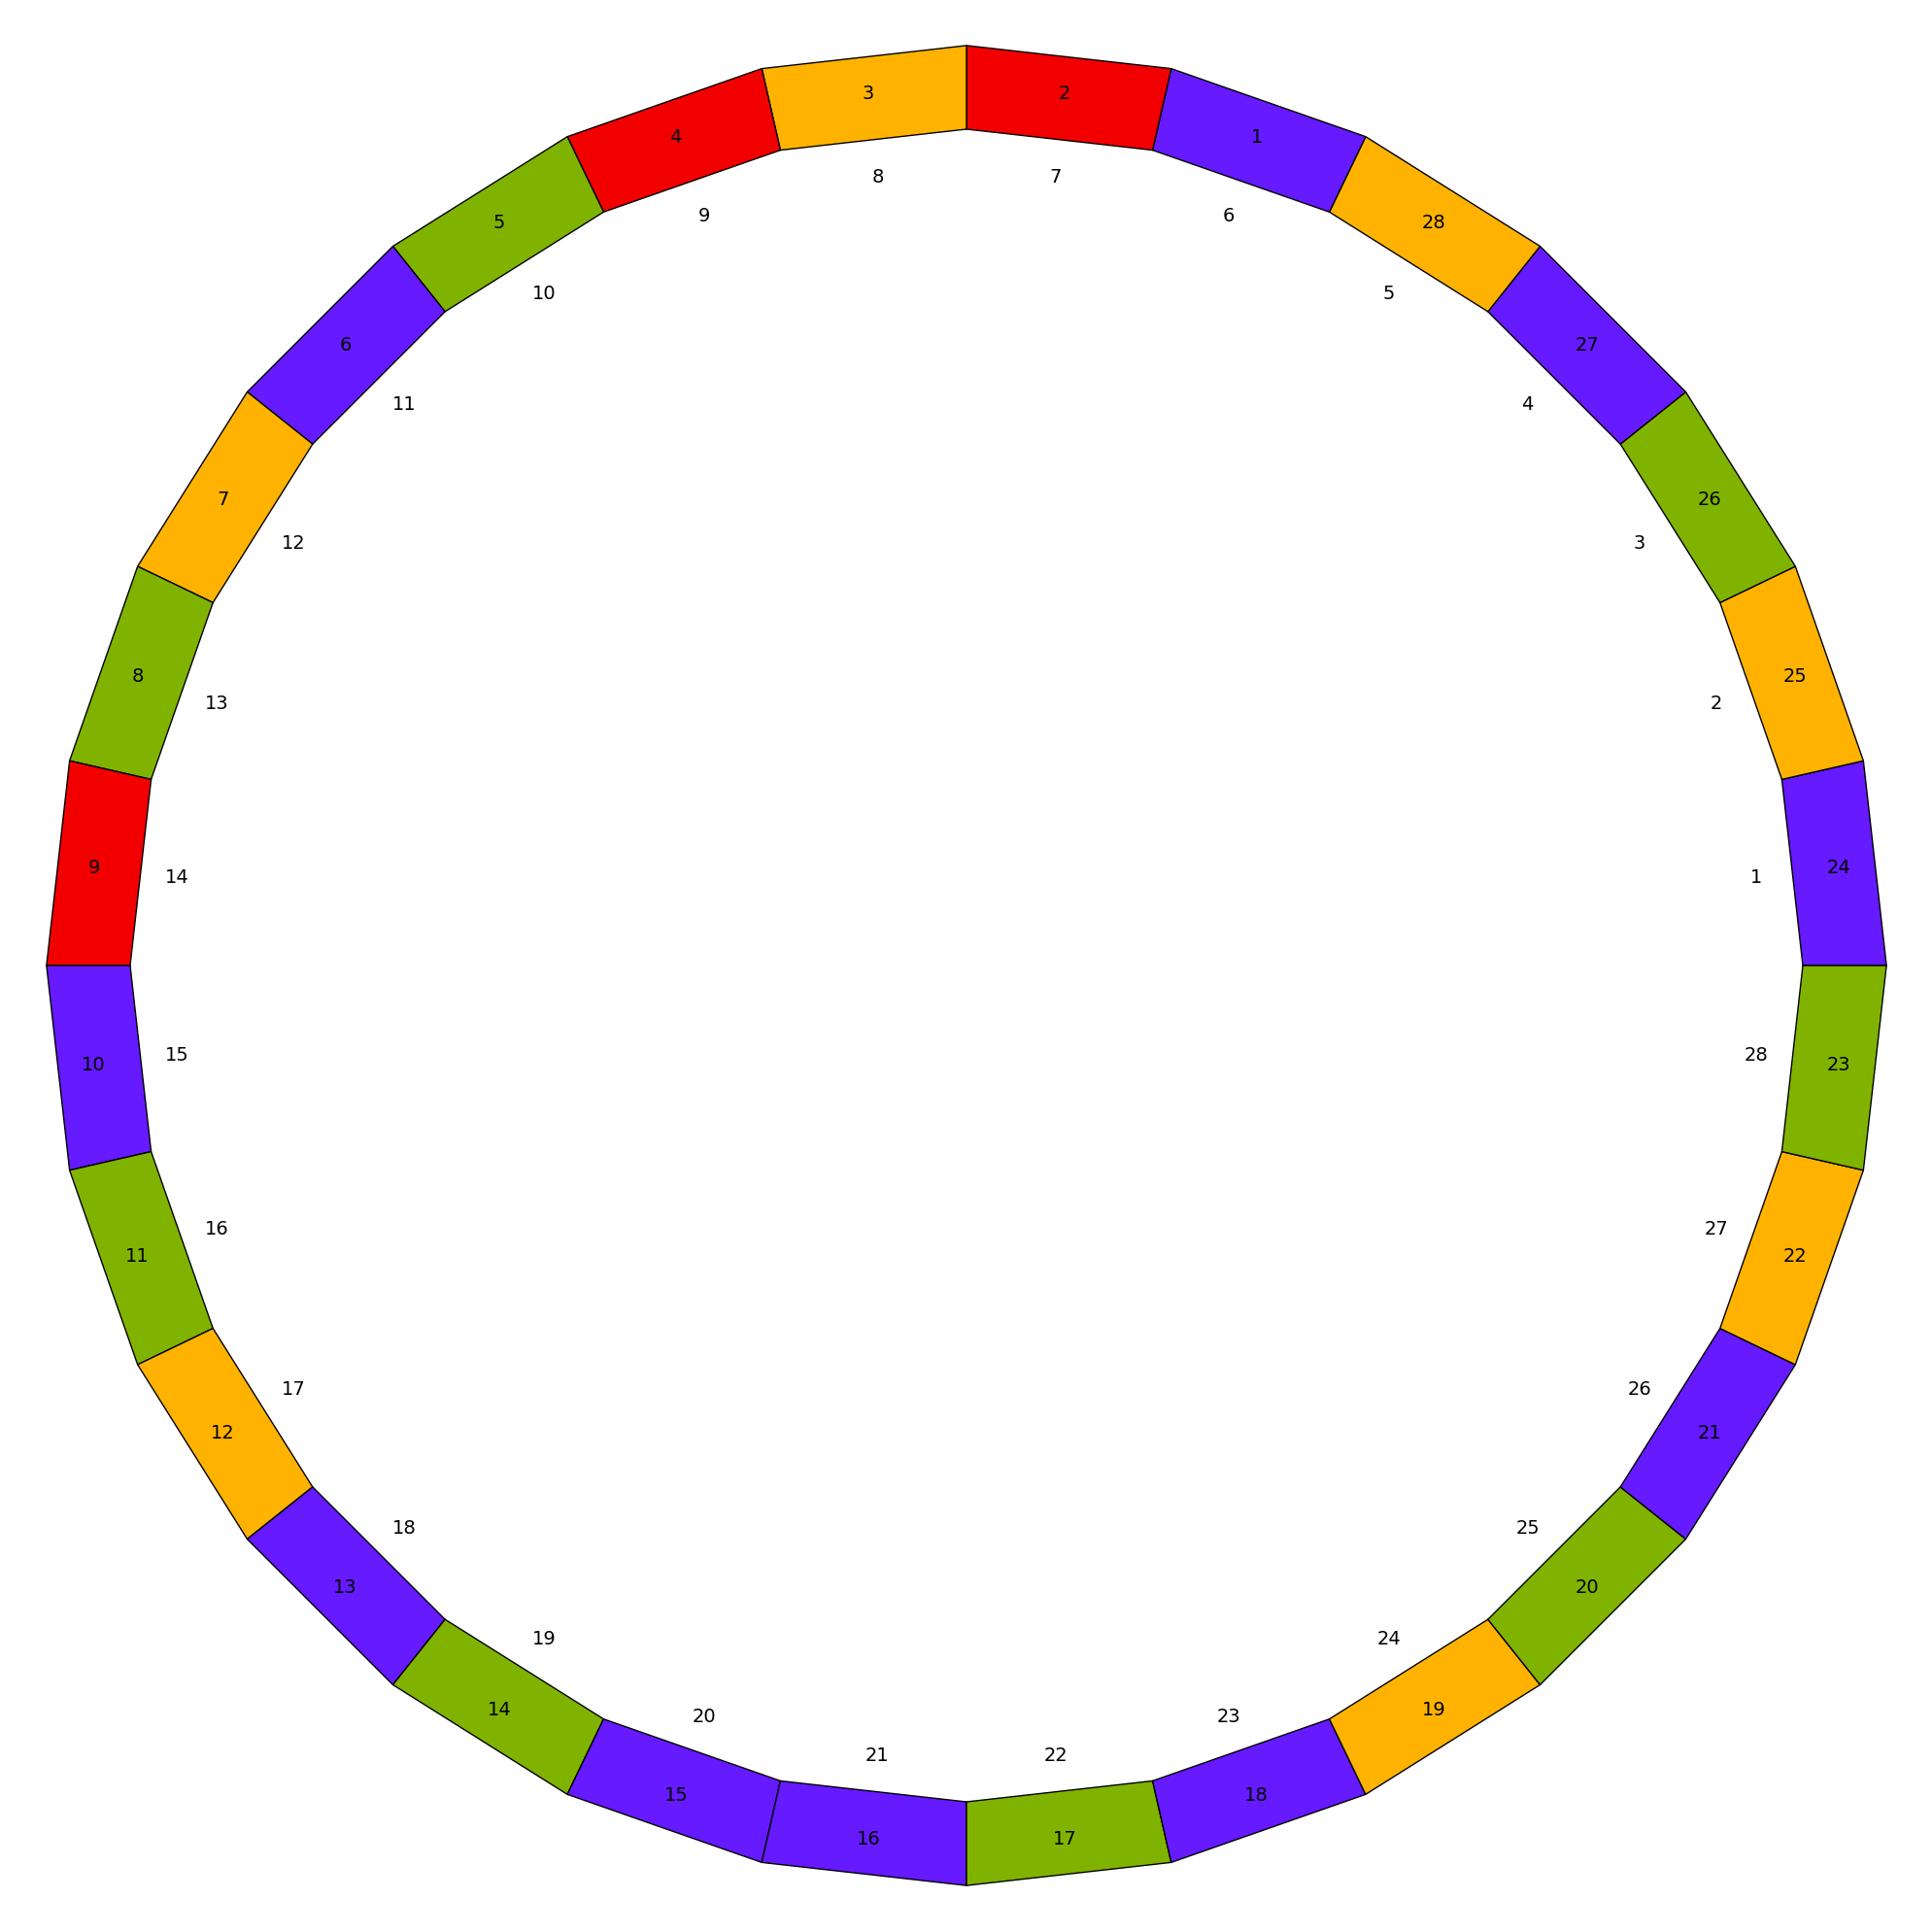

In [94]:
circle.rotateLeft(5)
print("Do 5 segments rotate")
circle.printCircle()

## Решение в общем виде

Возьмём $n$ - количество цветов.

Из следствия мы можем найти количество раскрасок, которые сохраняет данный элемент $g \in \mathbb{G}$:

$|\mathbb{C}^{e}| = |\mathbb{C}^{c(\tau^0)}| = |\mathbb{C}^{c(e)}| = n^{28}$ для $g = e$.

$|\mathbb{C}^{\tau^k}| = |\mathbb{C}^{c(\tau^k)}| = $n$^{1} = 4$ для $g = \tau^k, k \in \{1, 3, 5, 9, 11, 13, 15, 17, 19, 23, 25, 27\}$. Количество различных $k$: $12$. 

$|\mathbb{C}^{\tau^k}| = |\mathbb{C}^{c(\tau^k)}| = $n$^{2}$ для $g = \tau^k, k \in \{[2, 6, 10, 18, 22, 26\}$. Количество различных $k$: $6$. 

$|\mathbb{C}^{\tau^k}| = |\mathbb{C}^{c(\tau^k)}| = $n$^{4}$ для $g = \tau^k, k \in \{4, 8, 12, 16, 20, 24\}$. Количество различных $k$: $6$. 

$|\mathbb{C}^{\tau^k}| = |\mathbb{C}^{c(\tau^k)}| = $n$^{7}$ для $g = \tau^k, k \in \{[7, 21\}$. Количество различных $k$: $2$. 

$|\mathbb{C}^{\tau^k}| = |\mathbb{C}^{c(\tau^k)}| = $n$^{14}$ для $g = \tau^k, k \in \{14\}$. Количество различных $k$: $1$. 

$|\mathbb{G}| = 28$

Воспользуемся леммой Берсайда
Количество различных способов раскрасить сектора круга с точностью до поворота круга равно $N = \frac{1}{|\mathbb{G}|} \sum_{g \in \mathbb{G}}{|\mathbb{X}^g|} = \frac{1}{28}(n^{28} + 12 \cdot n^{1} + 6 \cdot n^{2} + 6 \cdot n^{4} + 2 \cdot n^{7} + 1 \cdot n^{14}) $

## Вывод
В ходе выполнения данной практической работы были сформированы представления о задачах о раскрасках, были выработаны умения использования леммы Бёрнсайда и перестановок для решения задач о раскрасках.